## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset

In [3]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:,-1].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [7]:
Y = Y.reshape(len(Y), 1)
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

In [12]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [13]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole Dataset

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

# Predicting the SVR Results

In [17]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [18]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

# Visualizing the SVR Results

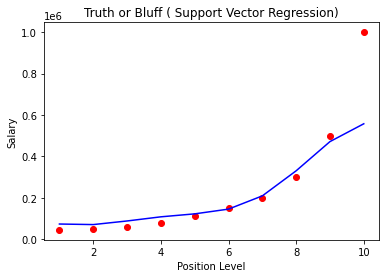

In [23]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = "red")
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X)),color = "blue")
plt.xlabel("Position Level")
plt.title("Truth or Bluff ( Support Vector Regression)")
plt.ylabel("Salary")
plt.show()

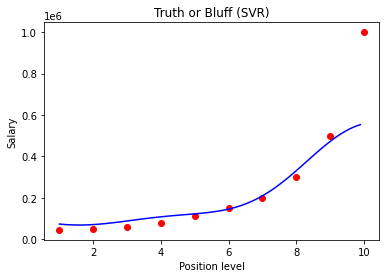

In [26]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()